# <center> Programming Exercise 1: Linear Regression </center>
## <center> Machine Learning </center>
## Introduction
In this exercise, we will implement linear regression and get to see it work on data. Before starting on this programming exercise, we strongly recommend watching the video lectures and completing the review questions forthe associated topics. 

### Files included in this exercise
`ex1.ipynb` - Python script that steps you through the exercise.  
`ex1_utils.py` - All necessary functions and solutions for this exercise:
- `load`
- `plot_data`
- `compute_cost`
- `gradient_descent`
- `feature_normalize`
- `compute_cost_multi`
- `gradient_descent_multi`
- `normal_eqn`

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

## 1. Simple Python/Numpy function

In order to return a 5 x 5 identity matrix by filling in the following code:

In [1]:
import numpy as np 
A = np.eye(5)
print(A)

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


## 2. Linear regression with one variable
In this part of this exercise, you will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.

You would like to use this data to help you select which city to expand to next. The file <b>ex1data1.txt</b> contains the dataset for our linear regression problem. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss.
### 2.1 Plotting the Data
Before starting on any task, it is often useful to understand the data by visualizing it. For this dataset, you can use a scatter plot to visualize the data, since it has only two properties to plot (profit and population).

The dataset is loaded from the data file into the variables X and y:

In [3]:
from ex1_utils import load
data = load('ex1_data/ex1data1.txt')
print('data shape: {}'.format(data.shape))
X = data[:,:1] # equivalent: X = (data[:, 0].reshape((-1, 1)))
y = data[:,-1:] # equivalent: y = (data[:,-1]).reshape((-1, 1))

m = len(y)
print("Length of y : {}".format(m))

data shape: (97, 2)
Length of y : 97


Next, the script calls the <b>plot_data</b> function to create a scatter plot of the data. Your job is to complete function <b>plot_data</b> to draw the plot.

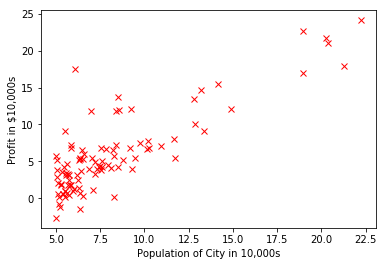

In [4]:
from ex1_utils import plot_data
_ = plot_data(X,y)

### 2.2 Gradient Descent 
In this part, you will fit the linear regression parameters $\theta$ to our dataset using gradient descent. 

#### 2.2.1 Update Equations
The objective of linear regression is to minimize the cost function 
$$J(\theta) = \frac{1}{2m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})^2 $$
where the hypothesis $h_{\theta}(x)$ is given by the linear model  
$$h_{\theta}(x)=\theta^{T}x=\theta_0+\theta_1x_1 $$

Recall that the parameters of your model are the $\theta_j$ values. These are the values you will adjust to minimize cost $J(\theta)$. One way to do this is to use the batch gradient descent algorithm. In batch gradient descent, each iteration performs the update 
$${\theta_j:=\theta_j-\alpha\frac{1}{m}\sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)} }    \text{(simultaneously update $\theta_j$ for all $j$)}.$$ 

With each step of gradient descent, your parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost $J(\theta)$.

<p style="border:3px; border-style:solid; border-color:#000000; padding: 1em;">
<b>Implementation Note:</b>  We store each example as a row in the the $X$ np.ndarray. To take into account the intercept term $\theta_0$, we add an additional first column to $X$ and set it to all ones. This allows us to treat $\theta_0$ as simply another ‘feature’.

</p>

#### 2.2.2 Implementation
We have already set up the data for linear regression. In the following lines, we add another dimension to our data to accommodate the $\theta_0$ intercept term. We also initialize the initial parameters to $\theta$ and the learning rate <b>alpha</b> to $0.01$.    

In [5]:
X = np.concatenate((np.ones((len(X),1)), X.reshape((-1, 1))), axis=1)  #Add a column of ones to X
theta = np.zeros((2,1)) #Initialize fitting parameters

#Some gradient descent settings:
iterations = 1500
alpha = 0.01

#### 2.2.3 Computing the cost $J(\theta)$
As you perform gradient descent to learn minimize the cost function $J(\theta)$, it is helpful to monitor the convergence by computing the cost. In this section, you will implement a function to calculate $J(\theta)$ so you can check the convergence of your gradient descent implementation.    

Your next task is to complete the function <b>compute_cost@ex1_utils.py</b>, which is a function that computes $J(\theta)$. As you are doing this, remember that the variables $X$ and $y$ are not scalar values, but matrices whose rows represent the examples from the training set.

Once you have completed the function, the next step run <b>compute_cost</b> once using $\theta$ initialized to zeros, and you will see the cost printed to the screen.

You should expect to see a cost of $32.07$.    




In [6]:
from ex1_utils import compute_cost
J = compute_cost(X, y, theta)
print('With theta = [0 ; 0]\nCost computed = %0.6f' %float(J))
print('Expected cost value (approx) 32.07\n')

# further testing of the cost function
J = compute_cost(X, y, np.array([[-1, 2]]))
print('With theta = [-1 ; 2]\nCost computed = %0.6f' %float(J))
print('Expected cost value (approx) 54.24\n')

With theta = [0 ; 0]
Cost computed = 32.072734
Expected cost value (approx) 32.07

With theta = [-1 ; 2]
Cost computed = 54.242455
Expected cost value (approx) 54.24



#### 2.2.4 Gradient descent
Next, you will implement gradient descent in the function <b>gradient_descent</b>. As you program, make sure you understand what you are trying to optimize and what is being updated. Keep in mind that the cost $J(\theta)$ is parameterized by the vector $\theta$, not $X$ and $y$. That is, we minimize the value of $J(\theta)$ by changing the values of the vector $\theta$, not by changing $X$ or $y$. Refer to the equations in this handout and to the video lectures if you are uncertain.

A good way to verify that gradient descent is working correctly is to look at the value of $J(\theta)$ and check that it is decreasing with each step. Assuming you have implemented <b>gradient_descent</b> and <b>compute_cost</b> correctly, your value of $J(\theta)$ should never increase, and should converge to a steady value by the end of the algorithm.

After you are finished, use your final parameters to plot the linear fit. Your final values for $\theta$ will also be used to make predictions on profits in areas of $35,000$ and $70,000$ people. 


In [7]:
print('Running Gradient Descent ...\n')
from ex1_utils import gradient_descent
#run gradient descent
(theta, J_history) = gradient_descent(X, y, theta, alpha, iterations)

#print theta to screen
print('Theta found by gradient descent:\n{:.6f}\n{:.6f}'.format(theta[0,0], theta[1,0]))
print('Expected theta values (approx):\n{:.4f}\n{:.4f}'.format(-3.6303, 1.1664))

Running Gradient Descent ...

Theta found by gradient descent:
-3.630291
1.166362
Expected theta values (approx):
-3.6303
1.1664


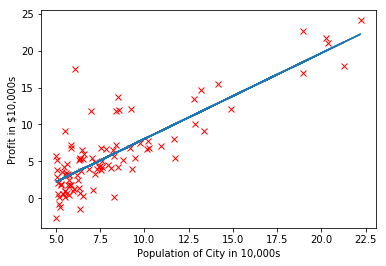

In [8]:
import matplotlib.pyplot as plt
#Plot the linear fit
fig = plot_data(X[:,1],y)
plt.plot(X[:,1], np.dot(X,theta), '-')
plt.show()

### 2.4 Visualizing $J(\theta)$
To understand the cost function $J(\theta)$ better, you will now plot the cost over a 2-dimensional grid of $\theta_0$ and $\theta_1$ values. In the next step , there is code set up to calculate $J(\theta)$ over a grid of values using the <b>compute_cost</b> function.

(a) Surface


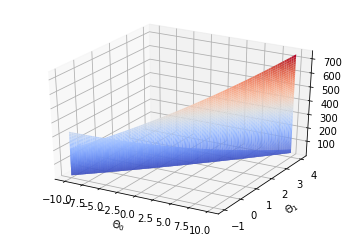

(b) Contour, showing minimum


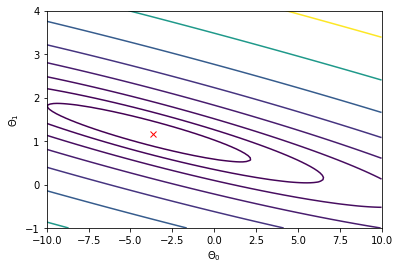

In [9]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib
from pylab import *

#Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100);

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

#Fill out J_vals
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.array([theta0_vals[i], theta1_vals[j]])
        J_vals[i,j] = compute_cost(X, y, t.reshape(-1,1))
        
# Because of the way meshgrids work in the surf command, we need to
# transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals.T

#Surface plot
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(theta0_vals, theta1_vals, J_vals,cmap=cm.coolwarm, rstride=1, cstride=1, antialiased=True)
plt.xlabel('$\Theta_0$')
plt.ylabel('$\Theta_1$')
#Show the plot
print('(a) Surface')
plt.show()

#Contour plot
plt.figure()
print('(b) Contour, showing minimum')
# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
plt.contour(theta0_vals, theta1_vals, J_vals, logspace(-2, 3, 20))
xlabel('$\Theta_0$')
ylabel('$\Theta_1$')
plt.plot(theta[0], theta[1], 'rx')
plt.show()

The purpose of these graphs is to show you that how $J(\theta)$ varies with changes in $\theta_0$ and $\theta_1$. The cost function $J(\theta)$ is bowl-shaped and has a global mininum. (This is easier to see in the contour plot than in the 3D surface plot). This minimum is the optimal point for $\theta_0$ and $\theta_1$, and each step of gradient descent moves closer to this point.

## 3. Linear regression with multiple variables
In this part, you will implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.

The file <b>ex1data2.txt</b> contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house.


In [10]:
from ex1_utils import load

print('Loading data...')

#Load Data
data = load('ex1_data/ex1data2.txt')
X = data[:,:2]
y = data[:,-1:]
#Print out some data points
print('First 10 examples from the dataset:')
for i in range(10):
    print('X = {}\ty = {}'.format(X[i,:], y[i]))

Loading data...
First 10 examples from the dataset:
X = [2104.    3.]	y = [399900.]
X = [1600.    3.]	y = [329900.]
X = [2400.    3.]	y = [369000.]
X = [1416.    2.]	y = [232000.]
X = [3000.    4.]	y = [539900.]
X = [1985.    4.]	y = [299900.]
X = [1534.    3.]	y = [314900.]
X = [1427.    3.]	y = [198999.]
X = [1380.    3.]	y = [212000.]
X = [1494.    3.]	y = [242500.]


### 3.1 Feature Normalization
The next script will start by loading and displaying some values from this dataset. By looking at the values, note that house sizes are about 1000 times the number of bedrooms. When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge much more quickly.

Your task here is to complete the function <b>feature_normalize</b> to:

 -  Subtract the mean value of each feature from the dataset.
 -  After subtracting the mean, additionally scale (divide) the feature values by their respective “standard deviations”.

The standard deviation is a way of measuring how much variation there is in the range of values of a particular feature (most data points will lie within ±2 standard deviations of the mean); this is an alternative to taking the range of values (max-min).

You will do this for all the features and your code should work with datasets of all sizes (any number of features / examples). Note that each column of the matrix $X$ corresponds to one feature.

<p style="border:3px; border-style:solid; border-color:#000000; padding: 1em;">
<b>Implementation Note:</b>  When normalizing the features, it is important to store the values used for normalization - the mean value and the standard deviation used for the computations. After learning the parameters from the model, we often want to predict the prices of houses we have not seen before. Given a new $x$ value (living room area and number of bedrooms), we must first normalize $x$ using the mean and standard deviation that we had previously computed from the training set.
</p>

In [11]:
from ex1_utils import feature_normalize

print('Normalizing Features ...')
(X, mu, sigma) = feature_normalize(X)
print('mu = [%0.4f %0.4f]' %tuple(mu[0,:]) +
      '\nExpected mu values(approx): [2000.6809 3.1702]')
print('sigma = [%0.4f %0.4f]' %tuple(sigma[0,:]) +
     '\nExpected sigma values(approx): [794.7024 0.7610]')

Normalizing Features ...
mu = [2000.6809 3.1702]
Expected mu values(approx): [2000.6809 3.1702]
sigma = [794.7024 0.7610]
Expected sigma values(approx): [794.7024 0.7610]


In [12]:
# Add intercept term to X
a = np.ones((X.shape[0],1))
X = np.append(a, X, axis=1)

## 3.2 Gradient Descent
Previously, you implemented gradient descent on a univariate regression problem. The only difference now is that there is one more feature in the matrix $X$. The hypothesis function and the batch gradient descent update rule remain unchanged.

You should complete the code in <b>compute_cost_multi</b> and <b>gradient_descent_multi</b> to implement the cost function and gradient descent for linear regression with multiple variables. If your code in the previous part (single variable) already supports multiple variables, you can use it here too.

Make sure your code supports any number of features and is well-vectorized. You can use 'X.shape[1]' to find out how many  features are present in the dataset.

### Optional exercise: Selecting learning rates
In this part of the exercise, you will get to try out different learning rates for the dataset and find a learning rate that converges quickly. You can change the learning rate by modifying and changing the part of the code that sets the learning rate.

The next phase will call your <b>gradient_descent</b> function and run gradient descent for about 50 iterations at the chosen learningrate. The function should also return the history of $J(\theta)$ values in a vector $J$. After the last iteration, the script plots the $J$ values against the number of the iterations.

If you picked a learning rate within a good range, your plot look similar the below <b>Figure</b>. If your graph looks very different, especially if your value of $J(\theta)$ increases or even blows up, adjust your learning rate and try again. We recommend trying values of the learning rate $\alpha$ on a log-scale, at multiplicative steps of about 3 times the previous value (i.e., 0.3, 0.1, 0.03, 0.01 and so on).

You may also want to adjust the number of iterations you are running if that will help you see the overall trend in the curve.

<img src="figure_4.png" width="70%" height="70%"/>
Figure:  Convergence of gradient descent with an appropriate learning rate

<p style="border:3px; border-style:solid; border-color:#000000; padding: 1em;">
<b>Implementation Note:</b> If your learning rate is too large, $J(\theta)$ can diverge and ‘blow up’, resulting in values which are too large for computer calculations. 
</p>

Notice the changes in the convergence curves as the learning rate changes. With a small learning rate, you should find that gradient descent takes a very long time to converge to the optimal value. Conversely, with a large learning rate, gradient descent might not converge or might even diverge!

In [13]:
from ex1_utils import gradient_descent_multi
#print('Running gradient descent ...')
# Choose some alpha value
alpha = 0.1
num_iters = 50
# Init Theta and Run Gradient Descent 
theta = np.zeros((3,1))
theta, J_history = gradient_descent_multi(X, y, theta, alpha, num_iters)


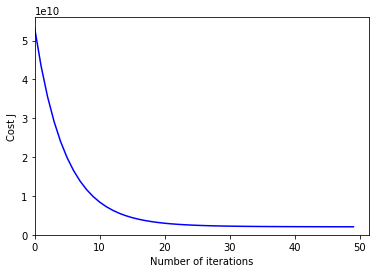

Theta computed from gradient descent:
[[ 3.38658249e+05]
 [ 1.04127516e+05]
 [-1.72205334e+02]]


In [14]:
# Plot the convergence graph
plt.figure()
J_numel = np.arange(J_history.shape[0]).reshape((-1,1))
plt.plot(J_numel, J_history, '-b', 2)
xlabel('Number of iterations')
ylabel('Cost J')
plt.xlim(0)
plt.ylim(0)
plt.show()

# Display gradient descent's result
print('Theta computed from gradient descent:')
print(theta)

Using the best learning rate that you found, run the script to run gradient descent until convergence to find the final values of $\theta$. Next, use this value of $\theta$ to predict the price of a house with 1650 square feet and 3 bedrooms. You will use value later to check your implementation of the normal equations. Don’t forget to normalize your features when you make this prediction!


In [15]:
d = np.array([[1650, 3]])
d = (d - mu)/sigma
d = np.append(np.ones((1,1)), d, axis=1)

price = np.dot(d,theta)

print('Predicted price of a 1650 sq-ft, 3 br house(using gradient descent):$%0.3f' %price)
print('Expected price value: 292748.085')


Predicted price of a 1650 sq-ft, 3 br house(using gradient descent):$292748.085
Expected price value: 292748.085


## 3.3 Normal Equations
In the lecture videos, you learned that the closed-form solution to linear regression is 
$$\theta = (X^TX)^{-1}X^T\vec{y}.$$  

Using this formula does not require any feature scaling, and you will get an exact solution in one calculation: there is no “loop until convergence” like in gradient descent.

Complete the code in <b>normal_eqn</b> to use the formula above to calculate $\theta$. Remember that while you don’t need to scale your features, we still need to add a column of 1's to the $X$ matrix to have an intercept term ($\theta_0$). The code below will add the column of 1's to $X$ for you.

Optional exercise: Now, once you have found $\theta$ using this method, use it to make a price prediction for a 1650-square-foot house with 3 bedrooms. <u>You should find that gives the same predicted price as the value you obtained using the model fit with gradient descent</u>.

In [16]:
from ex1_utils import load, normal_eqn
print('Solving with normal equations...')
#Load Data
data = load('ex1_data/ex1data2.txt')
X = data[:,:2]
y = data[:,-1:]
m = y.shape[0]

# Add intercept term to X
X = np.append(np.ones((m,1)), X, axis=1)

theta = normal_eqn(X, y)
# Display normal equation's result
print('Theta computed from the normal equations:\n%0.4f \n%0.4f \n%0.4f' %tuple(theta[:]))
# Estimate the price of a 1650 sq-ft, 3 br house
d = np.array([1, 1650, 3])
price = np.dot(d,theta)
print('Predicted price of a 1650 sq-ft, 3 br house (using normal equations): $%f' %price)

Solving with normal equations...
Theta computed from the normal equations:
89597.9095 
139.2107 
-8738.0191
Predicted price of a 1650 sq-ft, 3 br house (using normal equations): $293081.464335
